# Module 4 - Linear Regression Basics

Linear regressions tries to fit a linear line through our data. For simplicity, we will start with two dimensions but it can easily be extended to `n` dimensions depending on your number of variables.

For this module, we will be using a library alled `statsmodels` which provides classes and functions to estimate different statistical models. It can also be used to conduct exploratory data analysis and run statistical tests.

Afterward, we will introduce `scikit-learn`, one of the best machine learning libraries for Python in the world.

In [2]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import statsmodels.api as sm
%matplotlib inline

In [4]:
from pandas import DataFrame

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

In [5]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


<AxesSubplot:xlabel='Year'>

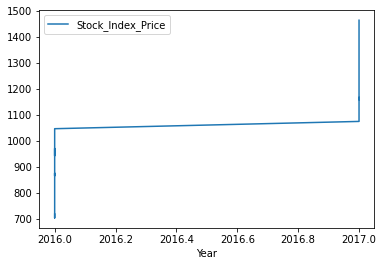

In [6]:
df.plot(x="Year", y="Stock_Index_Price")

In [7]:
import pandas as pd

In [8]:
df["Date"] = df['Month'].map(str) + '-' + df['Year'].map(str)
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price,Date
0,2017,12,2.75,5.3,1464,2017-12-01
1,2017,11,2.50,5.3,1394,2017-11-01
2,2017,10,2.50,5.3,1357,2017-10-01
3,2017,9,2.50,5.3,1293,2017-09-01
4,2017,8,2.50,5.4,1256,2017-08-01


<AxesSubplot:xlabel='Date'>

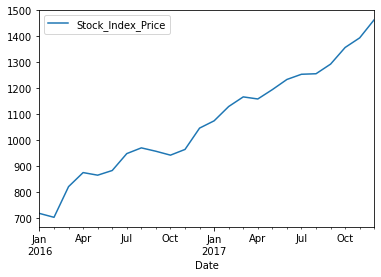

In [10]:
df.plot(x="Date", y="Stock_Index_Price")

<AxesSubplot:xlabel='Interest_Rate', ylabel='Stock_Index_Price'>

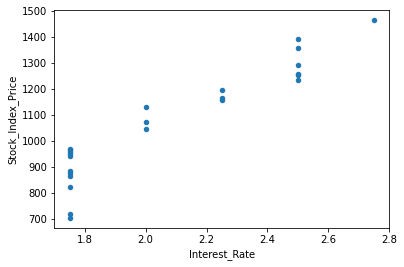

In [11]:
df.plot.scatter("Interest_Rate","Stock_Index_Price")

<AxesSubplot:xlabel='Unemployment_Rate', ylabel='Stock_Index_Price'>

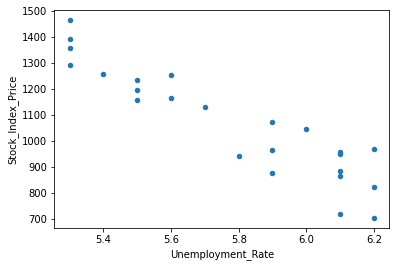

In [12]:
df.plot.scatter("Unemployment_Rate","Stock_Index_Price")

## Statsmodels

### Simple linear regression

$$
Y = wX + B
$$

- Y = Dependent variable (output/outcome/prediction/estimation)
- B = Bias (Y-Intercept)
- M($w$) = Weight - slope of the regression line (the effect that X has on Y)
- X = Independent variable (input variable used in the prediction of Y)

In [14]:
X = df['Interest_Rate']
Y = df['Stock_Index_Price']

X = sm.add_constant(X) # adding a constant

In [15]:
model = sm.OLS(Y, X).fit()

In [16]:
model

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.95e-11
Time:                        20:09:06   Log-Likelihood:                -136.94
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      22   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -99.4643     95.210     -1.045      0.308    -296.918      97.990
Interest_Rate   564.2039     45.317     12.450      0.000     470.221     658.186
==============================================================================
Omnibus:                        5.361   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                3.647
Skew:                          -0.927   Prob(JB):                        0.161
Kurtosis:                       3.459   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple linear regression

$$
Y = B + w_1X_1 + w_2X_2 + ...
$$

In [18]:
X = df[['Interest_Rate','Unemployment_Rate']]
Y = df['Stock_Index_Price']

X = sm.add_constant(X) # Here we will add a constant

In [19]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           4.04e-11
Time:                        20:13:50   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.248      2.000      0.059     -71.685    3668.493
Interest_Rate       345.5401    111.367      3.103      0.005     113.940     577.140
Unemployment_Rate  -250.1466    117.950     -2.121      0.046    -495.437      -4.856
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Scikit-Learn

In [21]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=1bea42a940e0c9b6b08e0f5c6f0e0fd38b0407c15f52f1eeaf2e9e01354e5b1e
  Stored in directory: c:\users\jessi\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn import linear_model

### Simple linear regression

In [23]:
X = df[['Interest_Rate']]
Y = df['Stock_Index_Price']
 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [24]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -99.46431881371655
Coefficients: 
 [564.20389249]


In [26]:
regr.score(X, Y) #r-square score

0.8757089547891359

### Multiple linear regression

In [27]:
# Here we have two input variables for our multiple regression. 
# If you just want to use one variable for a simple linear regression, then you could use something like: `X = df['Interest_Rate']`. 
# Alternatively, you may add additional variables within the brackets.

X = df[['Interest_Rate','Unemployment_Rate']] 
Y = df['Stock_Index_Price'] # This is the output variable (what we are trying to predict)

regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [28]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]


In [29]:
regr.score(X, Y)

0.8976335894170216